# Performance Evaluation Methods

**Aim**: The aim of this notebook is understand the various performance evaluation methods that can be used to evaluate your model. 

## Table of contents

1. Performance evaluation methods for classification algorithms
2. Performance evaluation methods for regression algorithms 
3. Performance evaluation methods for unsupervised algorithms


## Package Requirements

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.cluster import KMeans

## Performance evaluation methods for classification algorithms

**Building the K-Nearest Neighbors Model**

In [2]:
#Reading in the fraud detection dataset 

df = pd.read_csv('fraud_prediction.csv')

In [3]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [4]:
#Splitting the data into training and test sets 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [5]:
# Building the K-NN Classifier 

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

**Building the Logistic Regression Model**

In [6]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Confusion Matrix**

In [7]:
from sklearn.metrics import confusion_matrix

#Creating predictions on the test set 

prediction = knn_classifier.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[6026   14]
 [  32 2432]]


In [8]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      6040
        1.0       0.99      0.99      0.99      2464

avg / total       0.99      0.99      0.99      8504



**Normalized Confusion Matrix**

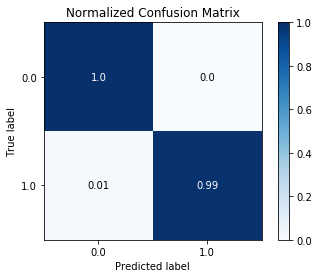

In [9]:
#Normalized confusion matrix for the K-NN model

prediction_labels = knn_classifier.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels, normalize=True)
plt.show()

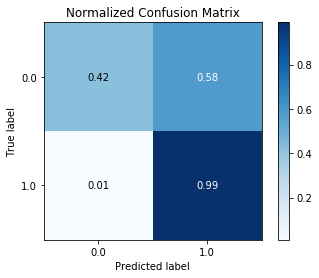

In [10]:
#Normalized confusion matrix for the logistic regression model

prediction_labels = logistic_regression.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels, normalize=True)
plt.show()

**Area under the curve**

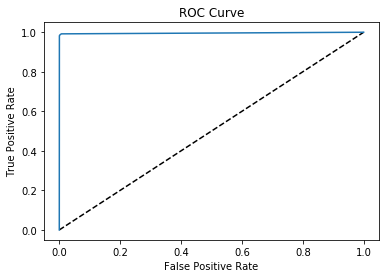

In [11]:
#Probabilities for each prediction output 

target_prob = knn_classifier.predict_proba(X_test)[:,1]

#Plotting the ROC curve 

fpr, tpr, thresholds = roc_curve(y_test, target_prob)

plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

In [12]:
#Computing the auc score 

roc_auc_score(y_test, target_prob)

0.99572277887675242

**Cumulative Gains Plot**

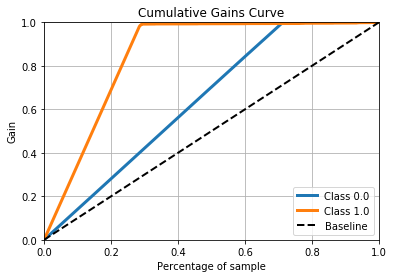

In [13]:
# Cumulative gains plot for the K-NN model

target_prob = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, target_prob)
plt.show()

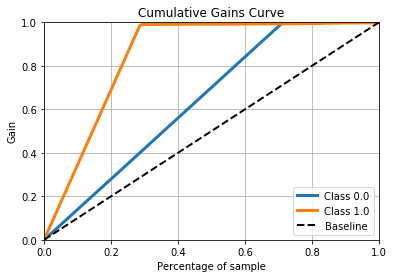

In [14]:
#Cumulative gains plot for the logistic regression model

target_prob = logistic_regression.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, target_prob)
plt.show()

**Lift Curve**

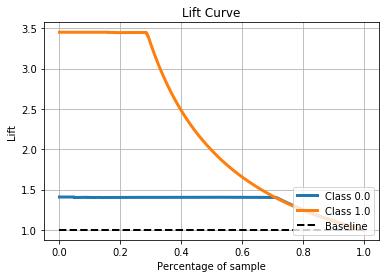

In [15]:
# Lift curve for the K-NN model

target_prob = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, target_prob)
plt.show()

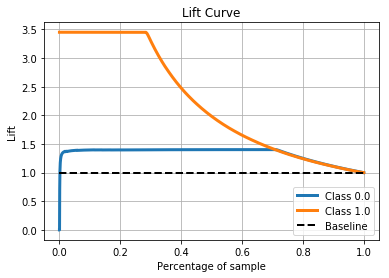

In [16]:
#Cumulative gains plot for the logistic regression model

target_prob = logistic_regression.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, target_prob)
plt.show()

**KS-Statistic plot**

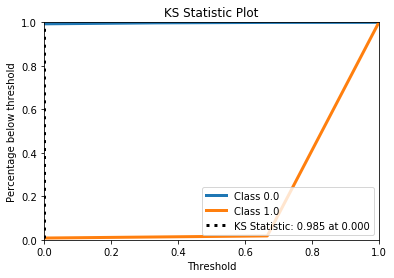

In [17]:
#KS plot for the K-NN model

target_proba = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)
plt.show()

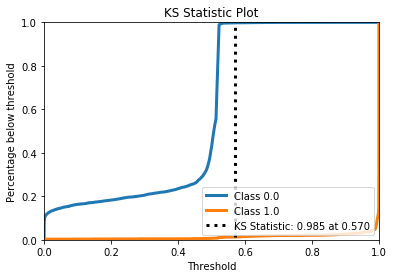

In [18]:
#KS plot for the logistic regression model

target_proba = logistic_regression.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)
plt.show()

**Calibration Plot**

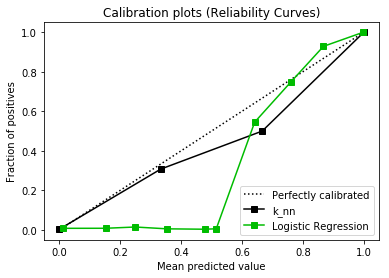

In [19]:
#Extracting the probabilites that the positive class will be predicted

knn_proba = knn_classifier.predict_proba(X_test)
log_proba = logistic_regression.predict_proba(X_test)

#Storing probabilities in a list

probas = [knn_proba, log_proba]

# Storing the model names in a list 

model_names = ["k_nn", "Logistic Regression"]

#Creating the calibration plot

skplt.metrics.plot_calibration_curve(y_test, probas, model_names)

plt.show()

**Learning Curve**

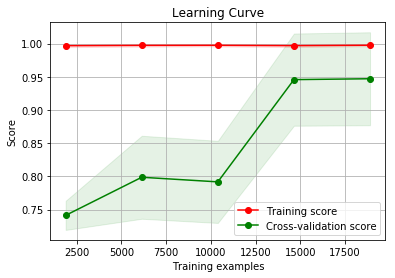

In [20]:
#Learning curve for the K-NN model

skplt.estimators.plot_learning_curve(knn_classifier, features, target)

plt.show()

**Cross-validated box plot**

In [21]:
#List of models

models = [('k-NN', knn_classifier), ('LR', logistic_regression)]

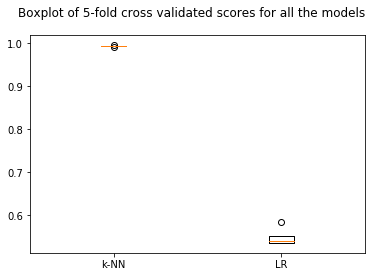

In [22]:
#Initializing empty lists in order to store the results
cv_scores = []
model_name_list = []

for name, model in models:
    
    #5-fold cross validation
    cv_5 = model_selection.KFold(n_splits= 5, random_state= 50)
    # Evaluating the accuracy scores
    cv_score = model_selection.cross_val_score(model, X_test, y_test, cv = cv_5, scoring= 'accuracy')
    cv_scores.append(cv_score)
    model_name_list.append(name)
    
# Plotting the cross-validated box plot 

fig = plt.figure()
fig.suptitle('Boxplot of 5-fold cross validated scores for all the models')
ax = fig.add_subplot(111)
plt.boxplot(cv_scores)
ax.set_xticklabels(model_name_list)
plt.show()

## Performance Evaluation methods for regression algorithms

**Building a linear regression model**

In [23]:
## Building a simple linear regression model

#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Define the feature and target arrays

feature = df['oldbalanceOrg'].values
target = df['amount'].values

In [24]:
#Initializing a linear regression model 

linear_reg = linear_model.LinearRegression()

#Reshaping the array since we only have a single feature

feature = feature.reshape(-1, 1)
target = target.reshape(-1, 1)

#Fitting the model on the data

linear_reg.fit(feature, target)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
predictions = linear_reg.predict(feature)

**Computing the Mean Absoloute Error**

In [26]:
metrics.mean_absolute_error(target, predictions)

442899.25151541876

**Computing the Mean Squared Error**

In [27]:
metrics.mean_squared_error(target, predictions)

1047287003098.2932

**Computing the Root Mean Squared Error**

In [28]:
np.sqrt(metrics.mean_squared_error(target, predictions))

1023370.4134370376

## Performance Evaluation methods for unsupervised algorithms

**Building a K-Means model**

In [29]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the target feature & the index

df = df.drop(['Unnamed: 0', 'isFraud'], axis = 1)

In [30]:
#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

**Elbow plot**

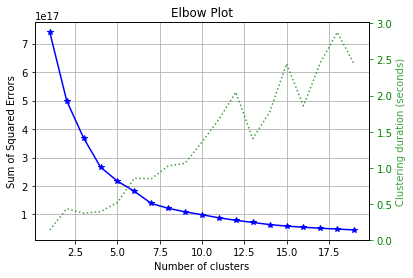

In [31]:
skplt.cluster.plot_elbow_curve(k_means, df, cluster_ranges=range(1, 20))
plt.show()